In [111]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data

In [112]:
from sqlalchemy import create_engine


driver = 'mysql+pymysql:'
user = 'adria'
password = '00000'
ip = '35.187.114.125'
database = 'vimet'

connection_string = f'{driver}//{user}:{password}@{ip}/{database}'
engine = create_engine(connection_string)

In [113]:
items = pd.read_sql('items', con = engine)

In [114]:
items = items.drop(columns='index')

In [115]:
items.head()

,Name,Lineitem quantity,Lineitem name,Lineitem price,Lineitem fulfillment status,Cancelled at,Refunded Amount,Vendor,Lineitem discount,tags
0,#1248,4,Plátano Canarias - 3/4 unidades,1.95,fulfilled,not cancelled,0.0,Fruites i Verdures Rovira,0,Plátano
1,#1248,2,Fresón Maresme - 1 caja (500 grs.),3.50,fulfilled,not cancelled,0.0,Fruites i Verdures Rovira,0,Fresón
2,#1248,1,Tomate Cherry - 200 grs,1.30,fulfilled,not cancelled,0.0,Fruites i Verdures Rovira,0,Tomate
3,#1248,1,Nueces California sin cáscara - 200 grs,3.44,fulfilled,not cancelled,0.0,Llegums Porta Novau,0,Nuez
4,#1248,3,Mandarina Orri - 500 grs.,2.00,fulfilled,not cancelled,0.0,Fruites i Verdures Rovira,0,Mandarina


In [116]:
len(items['tags'].value_counts())

154

We have 154 different items, we will cluster them creating a tag2 with more general terms, according to a reference on mediterranean diet:
* Dulces
* Patata
* Carne roja
* Carne procesada
* Carne blanca
* Pescado
* Huevos
* Legumbres
* Lácteos
* Especias
* Frutos secos
* Frutas
* Verduras
* Cereales
* Aceite

In [117]:
# We create a dicitonary classifying all the items
dict_tags = {'Dulces':['Obleas', 'Chocolate'], 
             'Patata': ['Patata'],
             'Carne roja': ['Ternera', 'Confit', 'Magret', 'Vaca', 'Filet', 'Solomillo', 'Entrecot'], 
             'Carne procesada': ['Jamón', 'Croquetas', 'Bull', 'Lasagna', 'Chorizo', 'Sumaia', 'salchichón',
                                 'Mortadela', 'Albóndigas', 'Librito', 'Butifarra', 'Salchichas', 'Canelones',
                                'Fuet', 'Espectec', 'Sobrasada', 'Bull'], 
             'Carne blanca': ['Pollo', 'Pavo', 'Conejo', 'Cerdo', 'Codorniz', 'Costillas'], 
             'Pescado': ['Mero', 'Bonito', 'Merluza', 'Salmón', 'Dorada', 'Mejillón', 'Lubina', 'Calamar', 'Sepia',
                        'Caballa', 'Lenguado', 'Almejas', 'Rape', 'Salmonetes', 'Boquerones', 'Berberechos', 'Atun',
                        'Gamba', 'Sardina', 'Pescadilla'], 
             'Huevos': ['Huevos', 'Revuelto', 'Tortilla'], 
             'Legumbres':['Garbanzo', 'Lenteja', 'Judía', 'Montgeta', 'Alubia', 'Frijoles', 'Azuki', 'Hummus'], 
             'Lácteos': ['Queso', 'Yogures'], 
             'Especias':['Eneldo', 'Ajo', 'Picantón'], 
             'Frutos secos': ['Nuez', 'Almendra', 'Macadamia', 'Avellana', 'Cacahuetes', 'Pasa', 'Dátiles',
                             'Anacardo', 'Pistacho', 'Orejones'], 
             'Frutas': ['Plátano','Manzana', 'Fresón', 'Naranja', 'Pera', 'Kiwi', 'Paraguayo', 'Mango', 'Chirimoya',
                        'Kakis', 'Ciruela', 'Mandarina',  'Melocotón', 'Piña','Arándanos', 'Limón', 'Bananas',
                       'Albaricoque', 'Granada', 'Higos', 'Cerezas', 'Frambuesas', 'Sandía', 'Nectarina', 'Pomelo',
                        'Uva', 'Melón', 'Paraguayo'], 
             'Verduras':['Tomate', 'Cebolla', 'Calabacín','Zanahoria', 'Pimiento', 'Aguacate', 'Brócoli', 'Lechuga',
                         'Berenjena', 'Calçots', 'Escarola', 'Cogollos', 'Calabaza', 'Acelgas', 'Espinacas','Puerro',
                         'Endivias', 'Rúcula', 'Alcachofa', 'Esparrago', 'Pepino', 'Canónigos', 'Ensalada', 'Coliflor',
                        'Col', 'Apio'],
             'Cereales':['Granola', 'Soja', 'Mijo', 'Avena', 'Quinoa', 'Arroz', 'Pan', 'Macarrones', 'Pasta',
                        'Spaghetti', 'Cous-cous', 'Espaguetis'],
             'Aceite':['Aceite'],
             'Others': ['Cep', 'Agua', 'Salsa', 'Girgola', 'Champiñón', 'Caldo', 'Shiitake', 'Rossinyol', 'Others']}

In [118]:
#We reverse (keys for values), the dictionary so that we can easily assign it to a new series.
dict_tags2 = {}

for key, values in dict_tags.items():
    for value in values:
        dict_tags2[value] = key

In [119]:
#We create a new serie with the 'group tags'
items['group_tags'] = items['tags'] 
items['group_tags'] = items['group_tags'].map(dict_tags2) 

# Numerical cathegories

In [120]:
items.describe()

,Lineitem quantity,Lineitem price,Refunded Amount,Lineitem discount
count,3120.000000,3120.000000,3120.000000,3120.0
mean,1.173718,3.333179,0.624708,0.0
std,0.895975,3.516737,9.384542,0.0
min,1.000000,0.250000,0.000000,0.0
25%,1.000000,1.600000,0.000000,0.0
50%,1.000000,2.400000,0.000000,0.0
75%,1.000000,3.800000,0.000000,0.0
max,30.000000,60.000000,309.000000,0.0


## Lineitem quantity

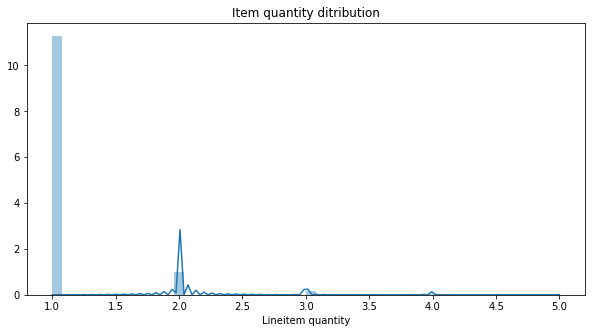

In [212]:
plt.figure(figsize=(10,5))
sns.distplot(items['Lineitem quantity'])
plt.title("Item quantity ditribution")

plt.show()

It seems we have generally a low quantity of items except for a few cases. Let's see what happens in these cases.

In [122]:
items[items['Lineitem quantity'] > 5]

,Name,Lineitem quantity,Lineitem name,Lineitem price,Lineitem fulfillment status,Cancelled at,Refunded Amount,Vendor,Lineitem discount,tags,group_tags
384,#1230,10,Hummus (pedido especial) - 1 Kg.,8.5,fulfilled,not cancelled,0.0,Llegums Porta Novau,0,Hummus,Legumbres
385,#1230,30,Fresón Maresme - 1 caja (250 grs.),1.5,fulfilled,not cancelled,0.0,Fruites i Verdures Rovira,0,Fresón,Frutas
993,#1200,12,Calçots de Valls (25 uds.),5.0,fulfilled,not cancelled,0.0,Fruites i Verdures Rovira,0,Calçots,Verduras
994,#1200,8,Butifarra con pimienta de pagés - 2 uds. (350 ...,4.2,fulfilled,not cancelled,0.0,Xarcuteria Alonso Andrés,0,Butifarra,Carne procesada
996,#1200,10,Barra de pan multicereales,1.0,fulfilled,not cancelled,0.0,Super,0,Pan,Cereales
997,#1200,16,Hamburguesa de cebolla queso y huevo - 2 uds.,3.8,fulfilled,not cancelled,0.0,Carns Ruano,0,Ternera,Carne roja
998,#1200,6,Brochetas de pechuga de pollo barbacoa - 5 uni...,5.5,fulfilled,not cancelled,0.0,El Pagés,0,Pollo,Carne blanca
1004,#1200,6,Salsa Romesco (500grs.),5.9,fulfilled,not cancelled,0.0,Fruites i Verdures Rovira,0,Salsa,Others
1005,#1199,12,Calçots de Valls (25 uds.),5.0,pending,2019-03-01 12:46:01 +0100,309.0,Fruites i Verdures Rovira,0,Calçots,Verduras
1006,#1199,8,Butifarra con pimienta de pagés - 2 uds. (350 ...,4.2,pending,not cancelled,0.0,Xarcuteria Alonso Andrés,0,Butifarra,Carne procesada


We have 3 orders (#1230, #1200 and #1199) that have a large number of items. This is because these items were used for specific events. We will decide later whether we will use them for the analysis.

## Lineitem price

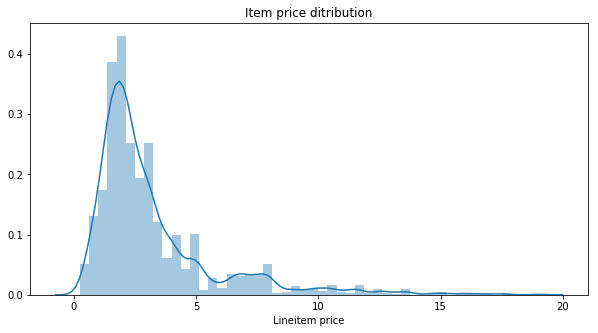

In [219]:
plt.figure(figsize=(10,5))
plt.title("Item price ditribution")

sns.distplot(items['Lineitem price'])
plt.show()

In [124]:
items[items['Lineitem price'] > 20]

,Name,Lineitem quantity,Lineitem name,Lineitem price,Lineitem fulfillment status,Cancelled at,Refunded Amount,Vendor,Lineitem discount,tags,group_tags
386,#1230,1,Mandarina Orri - 7 Kg. (60 uds.),28.00,fulfilled,not cancelled,0.00,Fruites i Verdures Rovira,0,Mandarina,Frutas
1003,#1200,2,Costillas de Cordero - 18 uds.,22.50,fulfilled,not cancelled,0.00,Carns Ruano,0,Costillas,Carne blanca
1015,#1199,2,Costillas de Cordero - 18 uds.,22.50,pending,not cancelled,0.00,Carns Ruano,0,Costillas,Carne blanca
1487,#1140,1,Cesta de Temporada (1/2 pensión) - 2,59.95,pending,2019-02-19 11:39:27 +0100,0.00,Mercat a Casa,0,Cesta,NaN
1488,#1139,1,Cesta de Temporada - 2,59.95,pending,2019-02-19 11:40:04 +0100,0.00,Mercat a Casa,0,Cesta,NaN
1489,#1138,1,Cesta de Temporada - 2,59.95,pending,2019-02-11 22:09:16 +0100,0.00,Mercat a Casa,0,Cesta,NaN
1490,#1137,1,Cesta de Temporada - 2,59.95,fulfilled,not cancelled,59.95,Mercat a Casa,0,Cesta,NaN
1551,#1127,1,Cesta de Temporada - 2,60.00,fulfilled,not cancelled,60.00,Mercat a Casa,0,Cesta,NaN


Similarly, we have 3 items with very high price (high quantities, for events), that refer to orders of events (the same ones as before). Additionally, we have 5 orders that are incorrect values. These values were introduced when changing the system of orders and shoud be deleted.

In [125]:
items = items[items['Name'] != '#1140']
items = items[items['Name'] != '#1139']
items = items[items['Name'] != '#1138']
items = items[items['Name'] != '#1137']
items = items[items['Name'] != '#1127']
items = items[items['Name'] != '#1230']
items = items[items['Name'] != '#1200']
items = items[items['Name'] != '#1199']

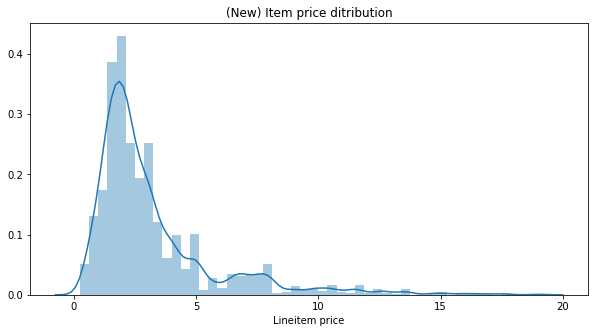

In [215]:
plt.figure(figsize=(10,5))

plt.title("(New) Item price ditribution")

sns.distplot(items['Lineitem price'])
plt.show()

## Refunded amount

In [127]:
items[items['Refunded Amount'] > 100]

,Name,Lineitem quantity,Lineitem name,Lineitem price,Lineitem fulfillment status,Cancelled at,Refunded Amount,Vendor,Lineitem discount,tags,group_tags
2440,#1076,1,Bull negro - 150 gramos,4.00,fulfilled,not cancelled,176.40,Charcutería Peñalver,0,Bull,Carne procesada
2471,#1075,1,Sardina pequeña - 2 raciones (500 grs.),4.00,fulfilled,not cancelled,158.55,Pescadería Alex y Carmen,0,Sardina,Pescado
2485,#1074,1,Alcachofa laminada (vacío) - 1 sobre (3-4 unid...,4.50,fulfilled,not cancelled,168.20,Verduras José,0,Alcachofa,Verduras
2572,#1072,1,Albóndigas para caldo - 175 gramos,3.50,fulfilled,not cancelled,123.80,Carnicería Vidal,0,Albóndigas,Carne procesada
2588,#1071,1,Mini Hamburguesas de pollo - 6 unidades,3.75,fulfilled,not cancelled,220.40,Aviram Mónica,0,Pollo,Carne blanca


We will drop the 'refunded amount' and 'lineitem discount' column as it does not provide useful information

In [128]:
items = items.drop(columns=['Refunded Amount', 'Lineitem discount'])

# Cathegorical features

## Vendor

In [129]:
items.groupby('Vendor').sum()

,Lineitem quantity,Lineitem price
Vendor,,
Aviram Monica,1,3.00
Aviram Mónica,305,1007.85
Carnicería Vidal,161,717.10
Carns Ruano,49,269.90
Charcutería Peñalver,57,309.05
El Pagés,147,445.24
El menjar sa de cada dia,63,214.30
Fruites i Verdures Rovira,743,1249.79
Frutas José,378,850.45


We see some mispelled vendor names so we will correct them.

In [130]:
items['Vendor'] = items['Vendor'].replace({'Aviram Monica':'Aviram Mónica', 'Helena Martin Elaborados': 'Helena Martin Xarcuteria',
                        'La Conca frutos secos': 'La Conca'})

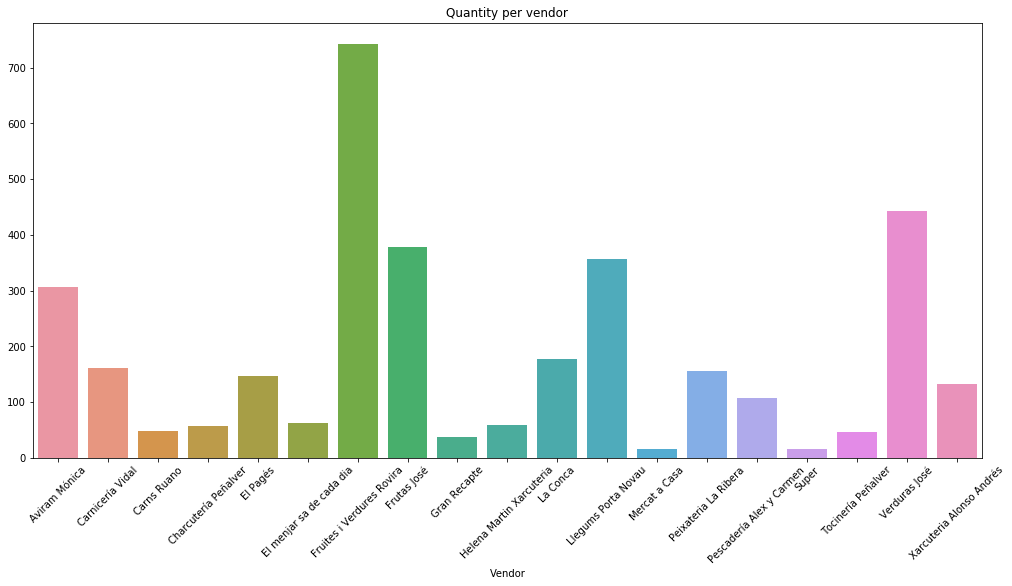

In [216]:
plt.figure(figsize=(17,8))
plt.title("Quantity per vendor")

sns.barplot(x =items.groupby('Vendor').sum()['Lineitem quantity'].index, y=list(items.groupby('Vendor').sum()['Lineitem quantity']))
plt.xticks(rotation=45)

plt.show()

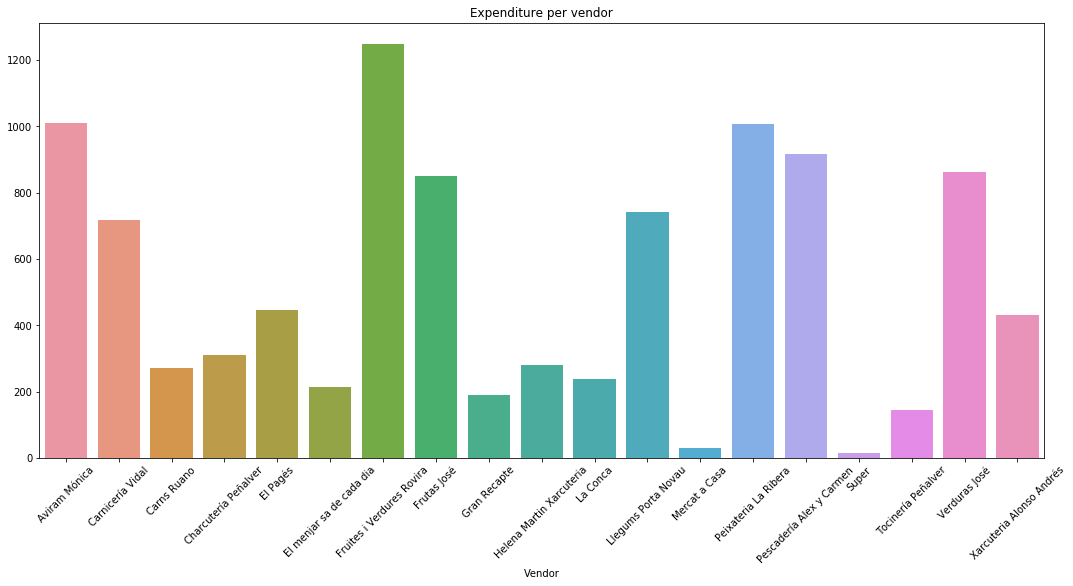

In [217]:
plt.figure(figsize=(18,8))
plt.title("Expenditure per vendor")

sns.barplot(x =items.groupby('Vendor').sum()['Lineitem price'].index, y=list(items.groupby('Vendor').sum()['Lineitem price']))
plt.xticks(rotation=45)

plt.show()

When considering the main providers, we can see some differences in terms of quantity of items purchased and total amount spent.

In [162]:
print(f"Top 5 vendors per quantity:\n{items.groupby('Vendor').sum()['Lineitem quantity'].sort_values(ascending=False).head()}")

Top 5 vendors per quantity:
Vendor
Fruites i Verdures Rovira    743
Verduras José                442
Frutas José                  378
Llegums Porta Novau          356
Aviram Mónica                306
Name: Lineitem quantity, dtype: int64


In [163]:
print(f"Top 5 vendors per expenditure:\n{items.groupby('Vendor').sum()['Lineitem price'].sort_values(ascending=False).head()}")

Top 5 vendors per expenditure:
Vendor
Fruites i Verdures Rovira    1249.79
Aviram Mónica                1010.85
Peixateria La Ribera         1005.95
Pescadería Alex y Carmen      918.15
Verduras José                 863.05
Name: Lineitem price, dtype: float64


Some observations:
* We can see that the first vendor is the first in both quantity and expenditure
* Llegums Porta Novau is the 4th in quantity but it's not in the Top5 in expenditure
* The opposite happens for the 'Pescaderias'

## Items

Considering the 'tags' grouping we have up to 151 food items 

In [174]:
len(items['tags'].unique())

151

If we take the 50 best selling products, we can account for almost 80% of all products sold.

In [171]:
sum(items.groupby('tags').sum()['Lineitem quantity'].sort_values(ascending=False).head(50))/sum(items.groupby('tags').sum()['Lineitem quantity'].sort_values(ascending=False))

0.7933333333333333

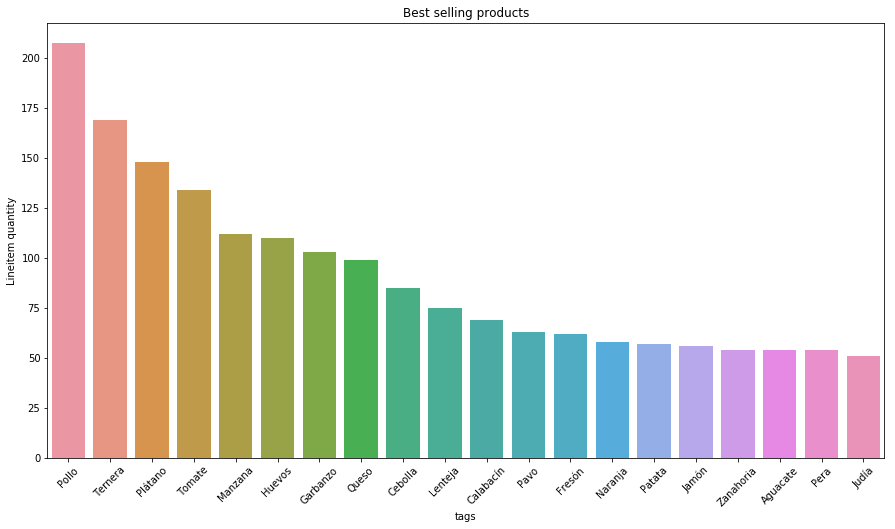

In [207]:
plt.figure(figsize=(15,8))
sns.barplot(x = items.groupby('tags').sum()['Lineitem quantity'].sort_values(ascending=False).head(20).index, y= items.groupby('tags').sum()['Lineitem quantity'].sort_values(ascending=False).head(20))
plt.title("Best selling products")
plt.xticks(rotation=45)

plt.show()

## Food groups

Let's take a look at the food groups to check if there is a balance with the Mediterranean Diet principles.

In [191]:
freq_food_groups = items.groupby('group_tags').sum()['Lineitem quantity'].sort_values(ascending=False).map(lambda x: x/sum(items.groupby('group_tags').sum()['Lineitem quantity']))

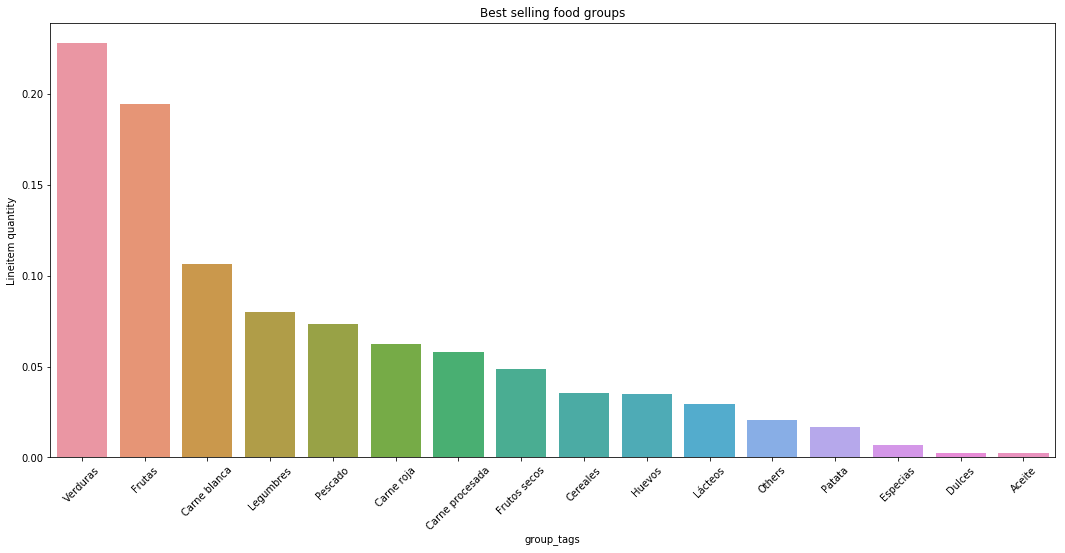

In [210]:
plt.figure(figsize=(18,8))

sns.barplot(x=freq_food_groups.index, y = freq_food_groups)
plt.title("Best selling food groups")
plt.xticks(rotation=45)

plt.show()

We can see a very high proportion of fruits and vegetables which is one of the main principles of the MD. Additionally, within the protein group (meat, fish and legumes), legumes are the second most common which is also good. The only unbalance is a high presence of processed meat and a low presence of cereals. The latter might be due to the fact that bread is usually bought the same day and thus is out of the scope.